In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import shutup; shutup.please()
from decimal import Decimal
from fractions import Fraction


## Extract the Data

In [5]:
Dow_df = pd.read_csv('../../csv/Dow_Jones_daily.csv')
Dow_df["Average_Dow"]= Dow_df[[" Open_Dow"," Close_Dow"]].mean(axis=1)
Nasdaq_df= pd.read_csv('../../csv/Nasdaq_daily.csv')
Nasdaq_df["Average_Nasdaq"]= Nasdaq_df[[" Open_Nasdaq"," Close_Nasdaq"]].mean(axis=1)
sp_df = pd.read_csv('../../csv/S&P_daily.csv')
sp_df["Average_S&P"]= sp_df[[" Open_S&P"," Close_S&P"]].mean(axis=1)

In [6]:
import functools as ft
dfs= [Dow_df,Nasdaq_df,sp_df]
indexes = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
indexes

,Date,Open_Dow,High_Dow,Low_Dow,Close_Dow,Average_Dow,Open_Nasdaq,High_Nasdaq,Low_Nasdaq,Close_Nasdaq,Average_Nasdaq,Open_S&P,High_S&P,Low_S&P,Close_S&P,Average_S&P
0,8/22/23,44048.41,44052.77,43704.59,43746.74,43897.575,13593.94,13598.76,13484.38,13505.87,13549.905,4415.33,4418.59,4382.77,4387.55,4401.440
1,8/21/23,43714.83,43954.95,43495.57,43873.30,43794.065,13347.26,13516.86,13325.59,13497.59,13422.425,4380.28,4407.55,4360.30,4399.77,4390.025
2,8/18/23,43226.74,43724.70,43226.74,43606.81,43416.775,13190.02,13335.87,13161.76,13290.78,13240.400,4344.88,4381.82,4335.31,4369.71,4357.295
3,8/17/23,44076.54,44106.83,43535.83,43582.21,43829.375,13527.30,13535.09,13303.44,13316.93,13422.115,4416.32,4421.17,4364.83,4370.36,4393.340
4,8/16/23,44236.07,44422.74,43945.35,43951.78,44093.925,13593.17,13644.32,13473.03,13474.63,13533.900,4433.79,4449.95,4403.55,4404.33,4419.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,1/8/08,14181.98,14328.19,13901.54,13915.82,14048.900,2508.00,2527.42,2440.51,2440.51,2474.255,1422.15,1430.28,1388.30,1390.19,1406.170
3932,1/7/08,14154.51,14265.25,14051.74,14181.97,14168.240,2513.10,2521.62,2471.23,2499.46,2506.280,1417.97,1423.87,1403.45,1416.18,1417.075
3933,1/4/08,14154.51,14524.53,14150.16,14154.51,14154.510,2571.08,2571.08,2502.68,2504.65,2537.865,1411.63,1444.01,1411.19,1411.63,1411.630
3934,1/3/08,14524.54,14632.08,14494.32,14524.54,14524.540,2612.40,2624.27,2592.18,2602.68,2607.540,1447.16,1456.80,1443.73,1447.16,1447.160


In [7]:
indexes = indexes.drop(columns=[' Open_Dow', ' High_Dow', ' Low_Dow', ' Close_Dow',' Open_Nasdaq', ' High_Nasdaq', ' Low_Nasdaq',' Close_Nasdaq',' Open_S&P', ' High_S&P', ' Low_S&P',' Close_S&P'])

In [8]:
indexes

,Date,Average_Dow,Average_Nasdaq,Average_S&P
0,8/22/23,43897.575,13549.905,4401.440
1,8/21/23,43794.065,13422.425,4390.025
2,8/18/23,43416.775,13240.400,4357.295
3,8/17/23,43829.375,13422.115,4393.340
4,8/16/23,44093.925,13533.900,4419.060
...,...,...,...,...
3931,1/8/08,14048.900,2474.255,1406.170
3932,1/7/08,14168.240,2506.280,1417.075
3933,1/4/08,14154.510,2537.865,1411.630
3934,1/3/08,14524.540,2607.540,1447.160


In [9]:
fedfunds_df = pd.read_csv('../../csv/FedFundsDaily.csv')
inflation_df = pd.read_csv('../../csv/InflationRateDaily.csv')
# macro = pd.merge(fedfunds_df,inflation_df, on= "Date",how="left")
macro = pd.merge(fedfunds_df,inflation_df, on= "Date", how= "left")
macro.dropna()
macro

,Date,DFF,Inflation_Rate
0,1/1/08,3.06,NaN
1,1/2/08,4.11,2.32
2,1/3/08,4.25,2.33
3,1/4/08,4.18,2.32
4,1/5/08,4.18,NaN
...,...,...,...
5708,8/18/23,5.33,2.32
5709,8/19/23,5.33,NaN
5710,8/20/23,5.33,NaN
5711,8/21/23,5.33,2.34


In [10]:
macro_index = pd.merge(macro,indexes,on="Date", how= "left")
macro_index=macro_index.dropna()
macro_index.to_csv("../../CleanedCSVs/Macro_withavgIndex.csv")

In [11]:
macro_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 1 to 5712
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3936 non-null   object 
 1   DFF             3936 non-null   float64
 2   Inflation_Rate  3936 non-null   object 
 3   Average_Dow     3936 non-null   float64
 4   Average_Nasdaq  3936 non-null   float64
 5   Average_S&P     3936 non-null   float64
dtypes: float64(4), object(2)
memory usage: 215.2+ KB


In [12]:
# macro_index = macro_index.apply(pd.to_numeric,errors='coerce')
macro_index['Inflation_Rate'] = pd.to_numeric(macro_index['Inflation_Rate'], errors='coerce')


In [13]:
macro_index.dtypes

Date               object
DFF               float64
Inflation_Rate    float64
Average_Dow       float64
Average_Nasdaq    float64
Average_S&P       float64
dtype: object

In [14]:
macro_index_cleaned = macro_index.dropna()

In [15]:
macro_index.columns

Index(['Date', 'DFF', 'Inflation_Rate', 'Average_Dow', 'Average_Nasdaq',
       'Average_S&P'],
      dtype='object')

the  correlation between the Average Nasdaq and inflation rate is  0.25


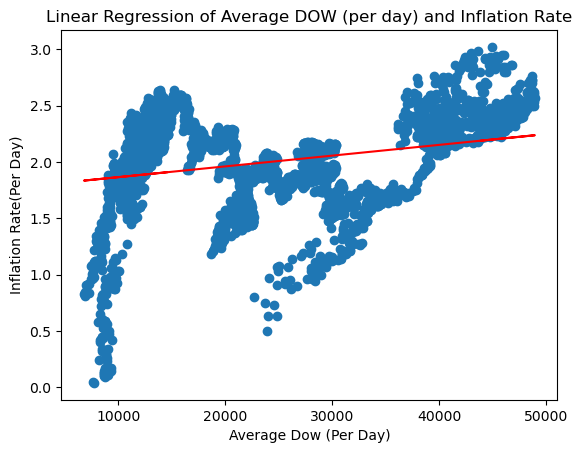

In [16]:
import scipy.stats as st
from scipy.stats import linregress
x_axis= macro_index_cleaned['Average_Dow']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average Nasdaq and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (per day) and Inflation Rate")
plt.xlabel('Average Dow (Per Day)')
plt.ylabel('Inflation Rate(Per Day)')
plt.savefig("figures/AverageDowvsInflation.png")
plt.show()

the  correlation between the Average S&P and inflation rate is  0.23


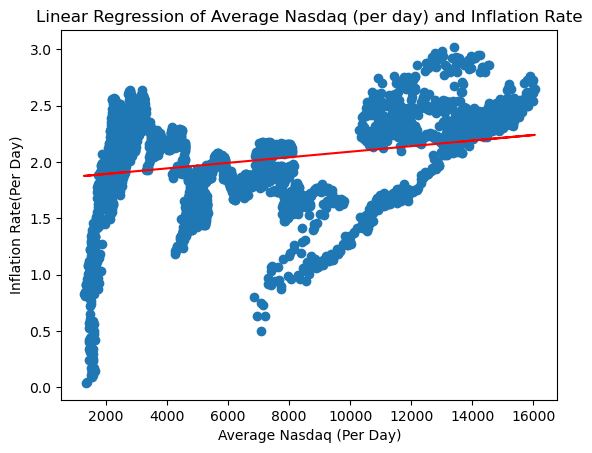

<Figure size 640x480 with 0 Axes>

In [17]:
import scipy.stats as st
x_axis= macro_index_cleaned['Average_Nasdaq']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average S&P and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Nasdaq (per day) and Inflation Rate")
plt.xlabel('Average Nasdaq (Per Day)')
plt.ylabel('Inflation Rate(Per Day)')
plt.show()
plt.savefig("figures/AverageNasdaqvsInflation.png")

the  correlation between the Average S&P and inflation rate is  0.25


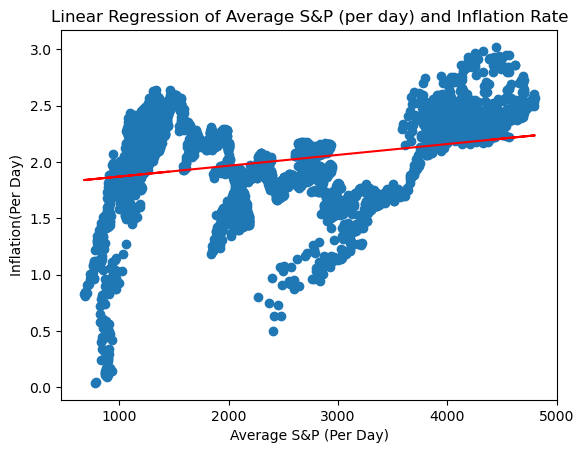

In [18]:

x_axis= macro_index_cleaned['Average_S&P']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average S&P and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (per day) and Inflation Rate")
plt.xlabel('Average S&P (Per Day)')
plt.ylabel('Inflation(Per Day)')
plt.savefig("figures/AverageS&PvsInflation.png")
plt.show()

the  correlation between the Average DOW and FedFunds is  0.39


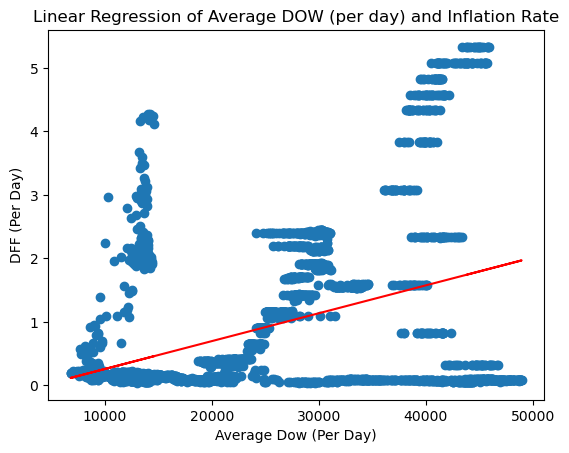

In [19]:
x_axis= macro_index_cleaned['Average_Dow']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average DOW and FedFunds is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (per day) and Inflation Rate")
plt.xlabel('Average Dow (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageDowvsDFFpng")
plt.show()

the  correlation between the Average Nasdaq and DFF is  0.35


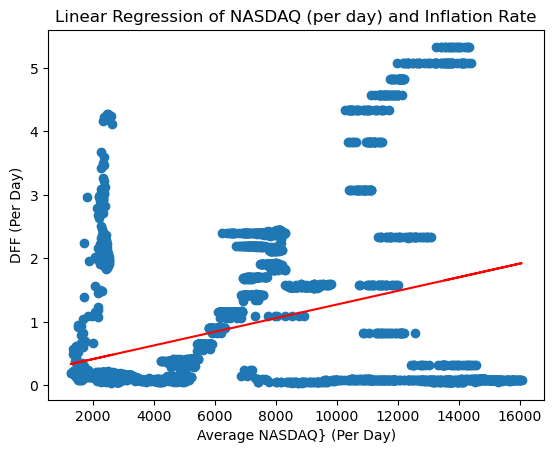

In [20]:
x_axis= macro_index_cleaned['Average_Nasdaq']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average Nasdaq and DFF is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of NASDAQ (per day) and Inflation Rate")
plt.xlabel('Average NASDAQ} (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageNasdaqvsDFF.png")
plt.show()

the  correlation between the Average S&P and FedFunds is  0.41


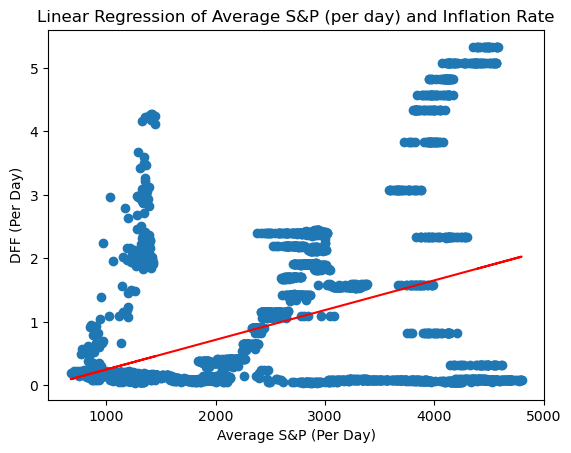

In [21]:
x_axis= macro_index_cleaned['Average_S&P']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average S&P and FedFunds is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (per day) and Inflation Rate")
plt.xlabel('Average S&P (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageS&PvsInflation.png")
plt.show()

In [22]:
#read in the rest of the charts 
monthly_one = pd.read_csv("../../CleanedCSVs/Macro_withavgIndex.csv")
monthly_one['Inflation_Rate'] = pd.to_numeric(monthly_one['Inflation_Rate'], errors='coerce')
monthly_one.head()

,Unnamed: 0,Date,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
0,1,1/2/08,4.11,2.32,14547.08,2631.435,1447.160
1,2,1/3/08,4.25,2.33,14524.54,2607.540,1447.160
2,3,1/4/08,4.18,2.32,14154.51,2537.865,1411.630
3,6,1/7/08,4.27,2.29,14168.24,2506.280,1417.075
4,7,1/8/08,4.27,2.29,14048.90,2474.255,1406.170


In [23]:
#move date to date time 
monthly_one['Date'] = pd.to_datetime(monthly_one['Date'])
monthly_one.set_index('Date', inplace= True)

In [24]:
#average out the date by month so we can mergwe with other macro files
macro_index_monthly = monthly_one.resample('M').mean()

macro_index_monthly

,Unnamed: 0,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
Date,,,,,,
2008-01-31,15.476190,3.931429,2.275238,13819.358333,2419.136429,1377.010714
2008-02-29,45.650000,2.962500,2.332500,13656.919500,2328.320750,1355.853000
2008-03-31,75.000000,2.629000,2.419000,13219.863250,2254.988500,1317.693250
2008-04-30,105.318182,2.267727,2.312727,13754.749773,2367.043864,1369.944318
2008-05-31,135.571429,1.993333,2.420000,14140.645238,2481.568810,1402.601667
...,...,...,...,...,...,...
2023-04-30,5583.947368,4.830000,2.267368,41109.224737,12067.621316,4119.108684
2023-05-31,5613.045455,5.045909,2.213636,41314.279091,12439.653182,4147.294091
2023-06-30,5644.904762,5.075714,2.200476,43315.891429,13447.516905,4339.481905


In [25]:
macro_index_monthly.dtypes

Unnamed: 0        float64
DFF               float64
Inflation_Rate    float64
Average_Dow       float64
Average_Nasdaq    float64
Average_S&P       float64
dtype: object

In [26]:
#drop the uneeded column
macro_index_monthly= macro_index_monthly.drop(["Unnamed: 0"], axis=1)


In [27]:
#reset date as column   
macro_index_monthly.reset_index(inplace=True)

In [28]:
#convert date to month year format 

macro_index_monthly['Year_Month'] = pd.to_datetime(macro_index_monthly['Date']).dt.strftime('%Y-%m')
macro_index_monthly['Year_Month'] = pd.to_datetime(macro_index_monthly['Year_Month'])
macro_index_monthly

,Date,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,Year_Month
0,2008-01-31,3.931429,2.275238,13819.358333,2419.136429,1377.010714,2008-01-01
1,2008-02-29,2.962500,2.332500,13656.919500,2328.320750,1355.853000,2008-02-01
2,2008-03-31,2.629000,2.419000,13219.863250,2254.988500,1317.693250,2008-03-01
3,2008-04-30,2.267727,2.312727,13754.749773,2367.043864,1369.944318,2008-04-01
4,2008-05-31,1.993333,2.420000,14140.645238,2481.568810,1402.601667,2008-05-01
...,...,...,...,...,...,...,...
183,2023-04-30,4.830000,2.267368,41109.224737,12067.621316,4119.108684,2023-04-01
184,2023-05-31,5.045909,2.213636,41314.279091,12439.653182,4147.294091,2023-05-01
185,2023-06-30,5.075714,2.200476,43315.891429,13447.516905,4339.481905,2023-06-01
186,2023-07-31,5.117000,2.296500,45079.773000,14033.748500,4506.729000,2023-07-01


In [29]:
#display data frame 
# macro_index_cleaned = macro_index_monthly.drop(["Date",axis = 1])
macro_index_cleaned = macro_index_monthly[['Year_Month', 'DFF', 'Inflation_Rate', 'Average_Dow', 'Average_Nasdaq','Average_S&P']]
index_df = pd.DataFrame(macro_index_cleaned)
index_df

,Year_Month,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
0,2008-01-01,3.931429,2.275238,13819.358333,2419.136429,1377.010714
1,2008-02-01,2.962500,2.332500,13656.919500,2328.320750,1355.853000
2,2008-03-01,2.629000,2.419000,13219.863250,2254.988500,1317.693250
3,2008-04-01,2.267727,2.312727,13754.749773,2367.043864,1369.944318
4,2008-05-01,1.993333,2.420000,14140.645238,2481.568810,1402.601667
...,...,...,...,...,...,...
183,2023-04-01,4.830000,2.267368,41109.224737,12067.621316,4119.108684
184,2023-05-01,5.045909,2.213636,41314.279091,12439.653182,4147.294091
185,2023-06-01,5.075714,2.200476,43315.891429,13447.516905,4339.481905
186,2023-07-01,5.117000,2.296500,45079.773000,14033.748500,4506.729000


In [30]:
#read in cpi data 
CPI= pd.read_csv("../../csv/CPIAUCSL_Monthly.csv")
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI.head()

,Date,CPIAUCSL
0,2008-01-01,212.174
1,2008-02-01,212.687
2,2008-03-01,213.448
3,2008-04-01,213.942
4,2008-05-01,215.208


In [31]:
#read in cpi and convert 
CPI['Year_Month'] = pd.to_datetime(CPI['Date']).dt.strftime('%Y-%m')
CPI['Year_Month'] = pd.to_datetime(CPI['Year_Month'])
CPI_cleaned = CPI[['Year_Month', 'CPIAUCSL']]
CPI_cleaned['Year_Month'] = pd.to_datetime(CPI_cleaned['Year_Month'])
CPI_df = pd.DataFrame(CPI_cleaned)
CPI_df

C:\Users\memel\AppData\Local\Temp\ipykernel_28272\2596727301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_cleaned['Year_Month'] = pd.to_datetime(CPI_cleaned['Year_Month'])


,Year_Month,CPIAUCSL
0,2008-01-01,212.174
1,2008-02-01,212.687
2,2008-03-01,213.448
3,2008-04-01,213.942
4,2008-05-01,215.208
...,...,...
182,2023-03-01,301.808
183,2023-04-01,302.918
184,2023-05-01,303.294
185,2023-06-01,303.841


In [32]:
#read in unemployment rate and convert 
UNRATE= pd.read_csv("../../csv/UNRATE_Monthly.csv")
UNRATE['Date'] = pd.to_datetime(UNRATE['Date'])
UNRATE['Year_Month'] = pd.to_datetime(UNRATE['Date']).dt.strftime('%Y-%m')
UNRATE['Year_Month'] = pd.to_datetime(UNRATE['Year_Month'])
UNRATE_cleaned = UNRATE[['Year_Month', 'UNRATE']]
UNRATE_df = pd.DataFrame(UNRATE_cleaned)
UNRATE_df

,Year_Month,UNRATE
0,2008-01-01,5.0
1,2008-02-01,4.9
2,2008-03-01,5.1
3,2008-04-01,5.0
4,2008-05-01,5.4
...,...,...
182,2023-03-01,3.5
183,2023-04-01,3.4
184,2023-05-01,3.7
185,2023-06-01,3.6


In [33]:
#final merge 
import functools as ft
dfs= [index_df,CPI_df,UNRATE_df]
indexmacro_monthly= ft.reduce(lambda left, right: pd.merge(left, right, on='Year_Month'), dfs)
#save to csv
indexmacro_monthly.to_csv("../../CleanedCSVs/Monthly_Macro_Indexes.csv")
indexmacro_monthly

,Year_Month,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,CPIAUCSL,UNRATE
0,2008-01-01,3.931429,2.275238,13819.358333,2419.136429,1377.010714,212.174,5.0
1,2008-02-01,2.962500,2.332500,13656.919500,2328.320750,1355.853000,212.687,4.9
2,2008-03-01,2.629000,2.419000,13219.863250,2254.988500,1317.693250,213.448,5.1
3,2008-04-01,2.267727,2.312727,13754.749773,2367.043864,1369.944318,213.942,5.0
4,2008-05-01,1.993333,2.420000,14140.645238,2481.568810,1402.601667,215.208,5.4
...,...,...,...,...,...,...,...,...
182,2023-03-01,4.653043,2.302174,39839.831957,11627.169783,3966.871957,301.808,3.5
183,2023-04-01,4.830000,2.267368,41109.224737,12067.621316,4119.108684,302.918,3.4
184,2023-05-01,5.045909,2.213636,41314.279091,12439.653182,4147.294091,303.294,3.7
185,2023-06-01,5.075714,2.200476,43315.891429,13447.516905,4339.481905,303.841,3.6


the  correlation between the Average DOW  and CPI is  0.94


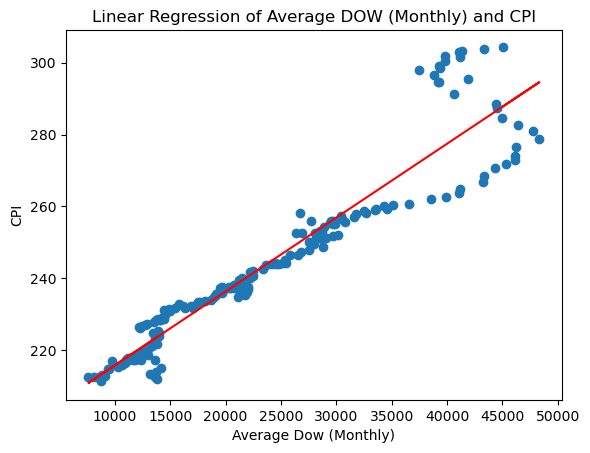

In [34]:
#regression and correlation for dow vs cpi 
x_axis= indexmacro_monthly['Average_Dow']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average DOW  and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (Monthly) and CPI")
plt.xlabel('Average Dow (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageDowvsCPIpng")
plt.show()

the  correlation between the Average Nasdaq and CPI is  0.92


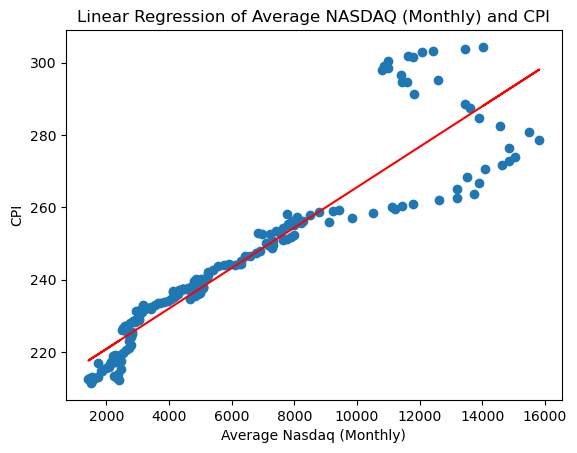

In [35]:
#regression and corelation for nasdaq and cpi
x_axis= indexmacro_monthly['Average_Nasdaq']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average Nasdaq and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average NASDAQ (Monthly) and CPI")
plt.xlabel('Average Nasdaq (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageNasdaqvsCPIpng")
plt.show()

the  correlation between the Average S&P and CPI is  0.95


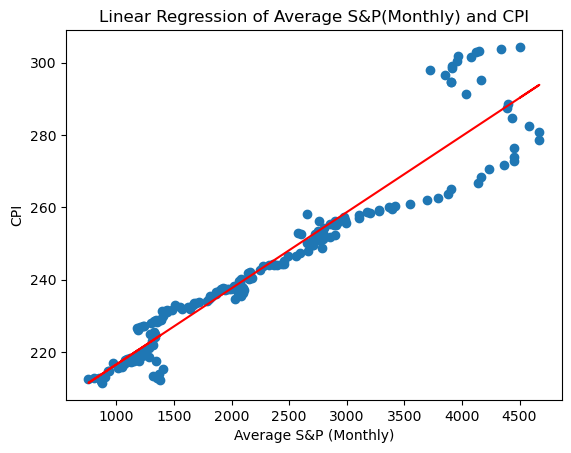

In [36]:
x_axis= indexmacro_monthly['Average_S&P']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average S&P and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P(Monthly) and CPI")
plt.xlabel('Average S&P (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageS&PvsCPIpng")
plt.show()

the  correlation between the Average Dow and Unemployement Rate is  -0.62


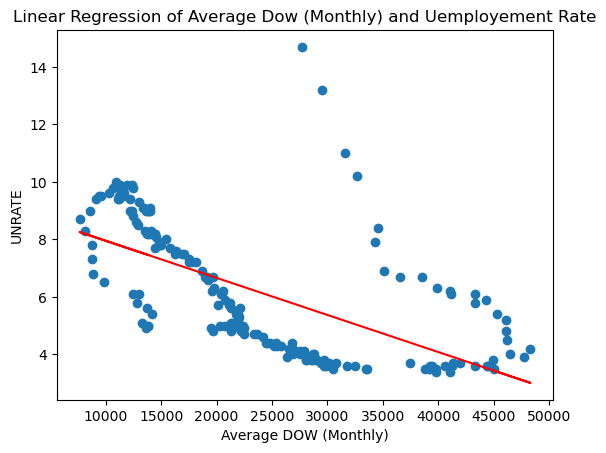

In [37]:
x_axis= indexmacro_monthly['Average_Dow']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average Dow and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Dow (Monthly) and Uemployement Rate")
plt.xlabel('Average DOW (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageDOWvsUNRATEpng")
plt.show()

the  correlation between the Average Nasdaq and Unemployement Rate is  -0.54


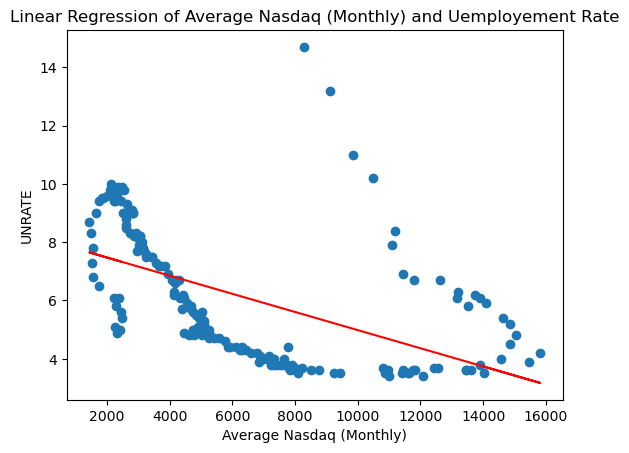

In [38]:
x_axis= indexmacro_monthly['Average_Nasdaq']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average Nasdaq and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Nasdaq (Monthly) and Uemployement Rate")
plt.xlabel('Average Nasdaq (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageNasdaqvsUNRATEpng")
plt.show()

the  correlation between the Average S&P and Unemployement Rate is  -0.62


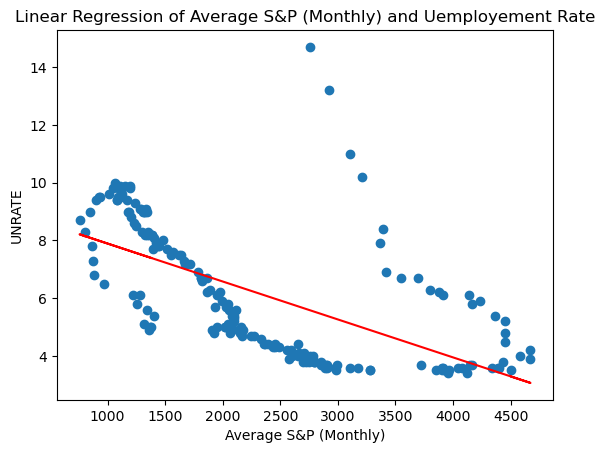

In [39]:
x_axis= indexmacro_monthly['Average_S&P']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average S&P and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (Monthly) and Uemployement Rate")
plt.xlabel('Average S&P (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageS&PvsUNRATEpng")
plt.show()